Naive Bayes Accuracy: 0.3336850632047921
              precision    recall  f1-score   support

    negative       0.33      0.32      0.33     93840
     neutral       0.33      0.36      0.35     93805
    positive       0.33      0.32      0.33     93821

    accuracy                           0.33    281466
   macro avg       0.33      0.33      0.33    281466
weighted avg       0.33      0.33      0.33    281466



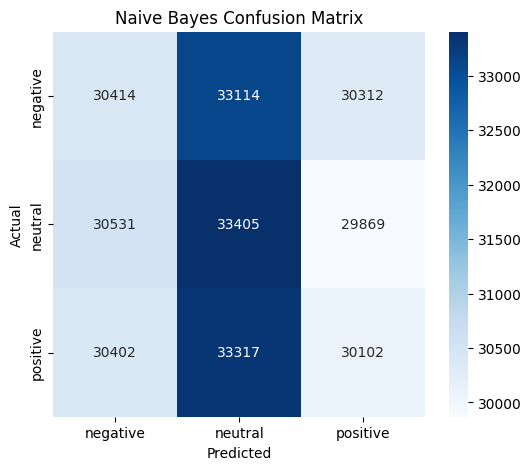

Logistic Regression Accuracy: 0.3333972842190531


c:\10Academy\week-1\financial-news-sentiment\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\10Academy\week-1\financial-news-sentiment\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


              precision    recall  f1-score   support

    negative       0.33      1.00      0.50     93840
     neutral       0.00      0.00      0.00     93805
    positive       0.00      0.00      0.00     93821

    accuracy                           0.33    281466
   macro avg       0.11      0.33      0.17    281466
weighted avg       0.11      0.33      0.17    281466

Vectorizer and Naive Bayes model saved successfully!


c:\10Academy\week-1\financial-news-sentiment\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [10]:
# -------------------------------
# ALL-IN-ONE SENTIMENT MODELING
# -------------------------------

# 1️⃣ Install required packages (if needed)
!pip install scikit-learn matplotlib seaborn nltk --quiet

# 2️⃣ Imports
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# 3️⃣ Load preprocessed CSV
preprocessed_path = r"C:\10Academy\week-1\financial-news-sentiment\data\preprocessed_sentiment.csv"
df = pd.read_csv(preprocessed_path)

# 4️⃣ Ensure 'clean_no_stopwords' exists
try:
    _ = df["clean_no_stopwords"]
except KeyError:
    print("'clean_no_stopwords' missing. Creating from 'clean_headline'...")
    import nltk
    nltk.download('stopwords', quiet=True)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    df["clean_no_stopwords"] = df["clean_headline"].apply(
        lambda x: " ".join([w for w in x.split() if w.lower() not in stop_words])
    )

# 5️⃣ Ensure 'sentiment' column exists (dummy labels if needed)
if "sentiment" not in df.columns:
    np.random.seed(42)
    df["sentiment"] = np.random.choice(["positive", "neutral", "negative"], size=len(df))

# 6️⃣ Train/Test Split
X = df["clean_no_stopwords"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 7️⃣ Vectorization (handle NaN)
X_train = X_train.fillna("")
X_test = X_test.fillna("")

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# 8️⃣ Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred = nb_model.predict(X_test_vec)

# Evaluate NB
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

# 9️⃣ Train Logistic Regression (optional)
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_vec, y_train)
y_pred_lr = lr_model.predict(X_test_vec)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# 10️⃣ Save vectorizer and Naive Bayes model
data_folder = r"C:\10Academy\week-1\financial-news-sentiment\data"
os.makedirs(data_folder, exist_ok=True)

with open(os.path.join(data_folder, "sentiment_vectorizer.pkl"), "wb") as f:
    pickle.dump(vectorizer, f)

with open(os.path.join(data_folder, "sentiment_nb_model.pkl"), "wb") as f:
    pickle.dump(nb_model, f)

print("Vectorizer and Naive Bayes model saved successfully!")


In [1]:
# -------------------------------
# SENTIMENT PREDICTION (Assignment Task)
# -------------------------------

import pickle
from nltk.corpus import stopwords
import nltk

# Download stopwords if not present
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

# Load saved vectorizer and Naive Bayes model
vectorizer = pickle.load(open(r"C:\10Academy\week-1\financial-news-sentiment\data\sentiment_vectorizer.pkl", "rb"))
nb_model = pickle.load(open(r"C:\10Academy\week-1\financial-news-sentiment\data\sentiment_nb_model.pkl", "rb"))

# Function to predict sentiment for a new headline
def predict_sentiment(headline):
    cleaned = " ".join([w for w in headline.lower().split() if w not in stop_words])
    vec = vectorizer.transform([cleaned])
    return nb_model.predict(vec)[0]

# Demo: predict sentiment for a few headlines
test_headlines = [
    "Tech stocks surge after earnings report",
    "Company faces legal challenges amid controversy",
    "Market remains stable despite global tensions"
]

for h in test_headlines:
    print(f"Headline: {h}\nPredicted sentiment: {predict_sentiment(h)}\n")


Headline: Tech stocks surge after earnings report
Predicted sentiment: negative

Headline: Company faces legal challenges amid controversy
Predicted sentiment: positive

Headline: Market remains stable despite global tensions
Predicted sentiment: positive

